<a href="https://colab.research.google.com/github/saurabhchavan7/City-Road-Structure-Analysis-Using-Clustering-Methods/blob/main/city_road_structure_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# will mount google drive into the collab environment
# this will allow to easily handle files enabling tasks like reading, writing, and manipulation within the Colab environment

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Set working directory
# it will consider this location as the current folder
# so if I want to access or save files it will do it here

%cd /content/drive/MyDrive/NEU_LECTURES/FDA/PROJECTS/

[Errno 2] No such file or directory: '/content/drive/MyDrive/NEU_LECTURES/FDA/PROJECTS/'
/content


In [ ]:
# Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving project1_table1.csv to project1_table1 (9).csv


In [ ]:
# used a pandas function to read data fromm a csv file

table1 = pd.read_csv('project1_table1_csv.csv')

In [ ]:
table1

,Region,City,Orientation(order),Entropy (Ho),Hw(weighted),Median(street length),Average Circuity,Average Node,P(dead-ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [ ]:
#renaming the column names
table1 = table1.rename(columns={'Entropy (Ho)':'Entropy(Ho)','Median(street length)':'Median(street_length)','Average Circuity':'Average_Circuity','Average Node':'Average_Node'})
table1


,Region,City,Orientation(order),Entropy(Ho),Hw(weighted),Median(street_length),Average_Circuity,Average_Node,P(dead-ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,3.465,3.452,64.6,1.059,2.385,0.360,0.108
1,Asia/Oceania,Beijing,0.335,3.177,3.206,177.5,1.053,2.985,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,3.573,3.572,64.4,1.065,2.610,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,3.571,3.563,61.0,1.137,2.932,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,3.391,3.347,52.8,1.065,2.741,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,2.542,2.474,97.2,1.028,3.107,0.136,0.369
96,US/Canada,St Louis,0.276,3.256,3.225,107.0,1.023,3.165,0.098,0.374
97,US/Canada,Toronto,0.474,2.980,2.885,103.1,1.090,2.994,0.109,0.217
98,US/Canada,Vancouver,0.749,2.488,2.413,103.7,1.022,3.308,0.073,0.455


In [ ]:
# to know about the data type and to check if there are any missing values in columns basically to know non-null count i have used info() method

table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 100 non-null    object 
 1   City                   100 non-null    object 
 2   Orientation(order)     100 non-null    float64
 3   Entropy(Ho)            100 non-null    float64
 4   Hw(weighted)           100 non-null    float64
 5   Median(street_length)  100 non-null    float64
 6   Average_Circuity       100 non-null    float64
 7   Average_Node           100 non-null    float64
 8   P(dead-ends)           100 non-null    float64
 9   P(4-way)               100 non-null    float64
dtypes: float64(8), object(2)
memory usage: 7.9+ KB


In [ ]:
# here i have checked the summary statistics
# this will help me to understand the min, max basically the range and distribution of the data
# count - it tells me the number of observations for each feature (in this case its 100 for all feature which means there are no null values)
# this information will guide me on preprocessing steps such as normalization scaling

table1.describe()

,Orientation(order),Entropy(Ho),Hw(weighted),Median(street_length),Average_Circuity,Average_Node,P(dead-ends),P(4-way)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,3.351270,3.339230,82.990000,1.055980,2.923000,0.147580,0.228080
std,0.224408,0.323212,0.337918,27.941044,0.027253,0.264333,0.080086,0.126133
min,0.002000,2.083000,2.103000,23.200000,1.011000,2.348000,0.027000,0.061000
25%,0.024000,3.244250,3.233500,64.550000,1.036750,2.710750,0.083750,0.138250
50%,0.062000,3.514500,3.495500,80.650000,1.052500,2.947500,0.130500,0.191000
75%,0.284750,3.557000,3.553250,97.125000,1.073000,3.107750,0.204250,0.309500
max,0.899000,3.582000,3.581000,233.000000,1.148000,3.548000,0.395000,0.576000


# Normalizing and Scaling the features

 **Why we need to maintain a uniform scale across the variables for K-means and Hierarchical clustering ?**


1. Maintaining a uniform scale across variables ensures that each feature contributes equally to the clustering process.
2. This is important for both K-means and Hierarchical clustering because they rely on distance measures to determine similarity between data points.
3.If features have different scales those with larger values could dominate the distance calculations leading to biased clustering results.
4. Thus scaling ensures fair comparisons and improves the accuracy of clustering algorithms.
5. Following i am rescaling the data since the column with largest value will have the most importance in clustering which we dont want since we want every column to be treated equally therefore no one column will dominate other

  *   I will use two different methods on the given data- the min-max and the standardization.
  *   In standardization the data will be transform such that the resulting distribution will have a mean of 0 and a standard deviation of 1.
 (it will tell how far from the mean the data is)
  *  Then i will use min-max scale to resize data of columns(all except Ho,P(dead-ends),P(4-way))to a fix range [0,1]
6. Which scaling method did i use for further analysis?\
I have used table 2, which has been scaled with Min-Max scaler. The reason is, in this case, I want to make sure all features are on a similar scale, like between 0 and 1. Also, the data doesn't have any extreme values. I checked using the 'describe' method, and I can see the minimum and maximum values. This ensures that each feature contributes fairly to the distance calculation, and no single feature dominates just because it has a larger scale.



# Scaled using Min-Max Scaler
FORMULA :

![Picture](https://drive.google.com/uc?export=view&id=1Y_-TphaqX3cXm3qrF7hQKbGetZOTZQN8)

In [ ]:
#Importing the preprocessing module from the scikit-learn library for accessingg the min-max scaler and standard scaler classes for scaling and standardizing the data

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# rescaling the Ho,Hw,Median,Average_Circuity,Average_Node by MinMax scale

scaler1 = MinMaxScaler()
columns_to_normalize_MinMax = ['Entropy(Ho)',	'Hw(weighted)','Median(street_length)',	'Average_Circuity',	'Average_Node']
table2 = table1.copy()
table2[columns_to_normalize_MinMax] = scaler1.fit_transform(table1[columns_to_normalize_MinMax])
table2

# by using fit_transform method it will computes the minimum and maximum values and also applies the transformation to the data.

,Region,City,Orientation(order),Entropy(Ho),Hw(weighted),Median(street_length),Average_Circuity,Average_Node,P(dead-ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,0.921948,0.912720,0.197331,0.350365,0.030833,0.360,0.108
1,Asia/Oceania,Beijing,0.335,0.729820,0.746279,0.735462,0.306569,0.530833,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,0.993996,0.993911,0.196378,0.394161,0.218333,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,0.992662,0.987821,0.180172,0.919708,0.486667,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,0.872582,0.841678,0.141087,0.394161,0.327500,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.306204,0.251015,0.352717,0.124088,0.632500,0.136,0.369
96,US/Canada,St Louis,0.276,0.782522,0.759134,0.399428,0.087591,0.680833,0.098,0.374
97,US/Canada,Toronto,0.474,0.598399,0.529093,0.380839,0.576642,0.538333,0.109,0.217
98,US/Canada,Vancouver,0.749,0.270180,0.209743,0.383699,0.080292,0.800000,0.073,0.455


In [ ]:
table2.describe()

,Orientation(order),Entropy(Ho),Hw(weighted),Median(street_length),Average_Circuity,Average_Node,P(dead-ends),P(4-way)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.178790,0.846077,0.836421,0.284986,0.328321,0.479167,0.147580,0.228080
std,0.224408,0.215618,0.228632,0.133179,0.198927,0.220277,0.080086,0.126133
min,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027000,0.061000
25%,0.024000,0.774683,0.764885,0.197092,0.187956,0.302292,0.083750,0.138250
50%,0.062000,0.954970,0.942152,0.273832,0.302920,0.499583,0.130500,0.191000
75%,0.284750,0.983322,0.981225,0.352359,0.452555,0.633125,0.204250,0.309500
max,0.899000,1.000000,1.000000,1.000000,1.000000,1.000000,0.395000,0.576000


# Scaled using StandardScaler

![Picture](https://drive.google.com/uc?export=view&id=1GmnAjfd6baaPP8deKxX71lBsuaet1bQ0)


In [ ]:
# rescaling the Ho,Hw,Median,Average_Circuity,Average_Node by StandardScaler scale

scaler2 = StandardScaler()
columns_to_normalize_MinMax = ['Entropy(Ho)',	'Hw(weighted)','Median(street_length)',	'Average_Circuity',	'Average_Node']
table3 = table1.copy()
table3[columns_to_normalize_MinMax] = scaler2.fit_transform(table1[columns_to_normalize_MinMax])
table3

,Region,City,Orientation(order),Entropy(Ho),Hw(weighted),Median(street_length),Average_Circuity,Average_Node,P(dead-ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,0.353647,0.335401,-0.661487,0.111372,-2.045566,0.360,0.108
1,Asia/Oceania,Beijing,0.335,-0.541898,-0.396254,3.399520,-0.109897,0.235734,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,0.689477,0.692306,-0.668681,0.332640,-1.190078,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,0.683258,0.665538,-0.790979,2.987859,0.034220,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,0.123542,0.023110,-1.085933,0.332640,-0.691994,0.175,0.096
...,...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,-2.516451,-2.573373,0.511133,-1.031848,0.699599,0.136,0.369
96,US/Canada,St Louis,0.276,-0.296245,-0.339744,0.863638,-1.216238,0.920124,0.098,0.374
97,US/Canada,Toronto,0.474,-1.154476,-1.350974,0.723356,1.254591,0.269954,0.109,0.217
98,US/Canada,Vancouver,0.749,-2.684366,-2.754799,0.744938,-1.253116,1.463834,0.073,0.455


In [ ]:
table3.describe()

,Orientation(order),Entropy(Ho),Hw(weighted),Median(street_length),Average_Circuity,Average_Node,P(dead-ends),P(4-way)
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,0.178790,9.436896e-17,-1.811884e-15,-8.193446e-16,2.358114e-15,-1.845191e-15,0.147580,0.228080
std,0.224408,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,0.080086,0.126133
min,0.002000,-3.943727e+00,-3.676803e+00,-2.150643e+00,-1.658774e+00,-2.186246e+00,0.027000,0.061000
25%,0.024000,-3.327822e-01,-3.144629e-01,-6.632858e-01,-7.091647e-01,-8.070100e-01,0.083750,0.138250
50%,0.062000,5.075690e-01,4.647793e-01,-8.416967e-02,-1.283356e-01,9.315309e-02,0.130500,0.191000
75%,0.284750,6.397241e-01,6.365397e-01,5.084352e-01,6.276642e-01,7.024504e-01,0.204250,0.309500
max,0.899000,7.174624e-01,7.190739e-01,5.395852e+00,3.393517e+00,2.376354e+00,0.395000,0.576000


# Correlation matrix:
In next step since to understand how each feature of the dataset relates to easch other will use correlation matrix \

Then after calculating the correlation matrix, will create a heatmap to visually represent the correlations between different columns \

This i am doing to check if there are variable in dataset that correlate with other variable then  it might be redundant to use both of them for clustering Hence will use any one of it \

So in this dataset as can be seen in heat map that Entropy(Ho) and Hw(weighted) both strongly correlate with each other hence we will use only entropy for clustering \

Similarly for P(4-way) and Average_Node both strongly correlates will go with P(4-way)

<ipython-input-121-f67ca65fd744>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = table2.corr()


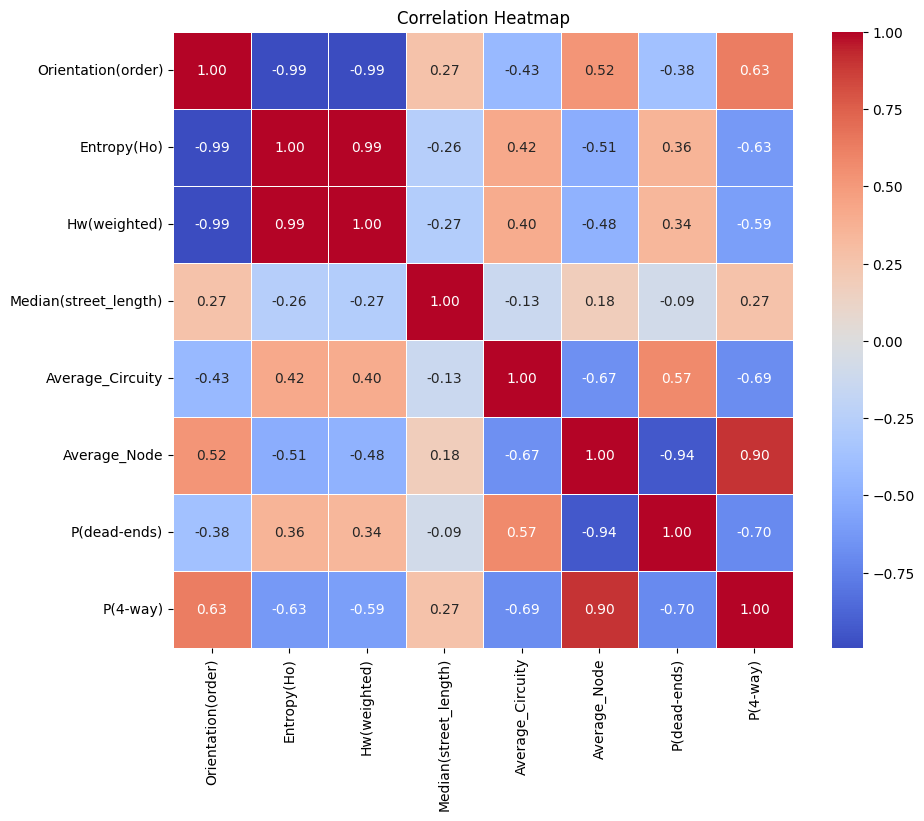

In [ ]:

corrmat = table2.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
table2.columns

Index(['Region', 'City', 'Orientation(order)', 'Entropy(Ho)', 'Hw(weighted)',
       'Median(street_length)', 'Average_Circuity', 'Average_Node',
       'P(dead-ends)', 'P(4-way)'],
      dtype='object')

In [ ]:
#here i will drop correlated columns i.e Hw(weighted), Average_Node

table2_modified = table2.drop(['Hw(weighted)','Average_Node'],axis=1).copy()
table2_modified

,Region,City,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,0.921948,0.197331,0.350365,0.360,0.108
1,Asia/Oceania,Beijing,0.335,0.729820,0.735462,0.306569,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,0.993996,0.196378,0.394161,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,0.992662,0.180172,0.919708,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,0.872582,0.141087,0.394161,0.175,0.096
...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.306204,0.352717,0.124088,0.136,0.369
96,US/Canada,St Louis,0.276,0.782522,0.399428,0.087591,0.098,0.374
97,US/Canada,Toronto,0.474,0.598399,0.380839,0.576642,0.109,0.217
98,US/Canada,Vancouver,0.749,0.270180,0.383699,0.080292,0.073,0.455


# Performing Elbow Method to find Optimal No of clusters
will use data in table 2 which is being scaled using MinMax Scaler

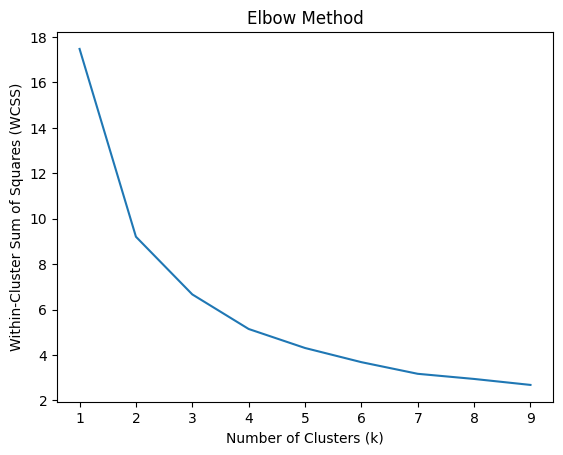

In [ ]:
k = []                                              # Created an empty list named k to store the number of clusters
wcss = []                                           # Created an empty list wcss k to store  within cluster sum of squares
for i in range(1,10):                               # created a loop iterating from 1 to 9 for variable i
  mdl = KMeans(n_clusters=i, n_init=10)             # this line will create a kmeans clustering model and assign it to variable mdl and for every iteration of the loop the algorithm undergoes the process of finding clusters 10[1 to 9] times with different starting points and this is repeated for each value of i in the loop.
  mdl.fit(table2_modified.iloc[:,2:])                        # here will train the model using data from table 2 in which we have not used first two columns for clustering
  k.append(i)                                       # this will add the curerent value of i to the list k
  wcss.append(mdl.inertia_)                         # the inertia(WCSS) is the sum of squared distances between each data point in a cluster and the centroid of that cluster it will help to understand how well the data is grouped in a cluster

sns.lineplot(x = k, y = wcss)                       # used to create a line plot
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

#Initializing K-Means MOdel with selected optimal number of cluster

In [ ]:
# following we are creating a k means clustering model
# where the alue of k is given as 4 hence the algorithm will group the data into 4 distinct clusters
# randomn state = 0  basically will ensure that if i run the code multiple times i will get the same result each time
# number of initializations i.e no of iterations in the loop i have assign auto so algorithm will automatically decide how many times to run its process with different initial configurations(default is 10)
k_means_model = KMeans(n_clusters=4, random_state=0, n_init= 'auto')

# the fit method will train the model on the given dataset so basically it will learn how to group the data into clusters based on the specified features
#the result of fit() will be assigned back to variable - k_means_model
k_means_model = k_means_model.fit(table2_modified.iloc[:,2:])

# i have specifies which feature to take for clustering
# then the predict() method will basically predic the cluster labels i.e 0/1/2/3 for each data point using the trained kmeans model
# then i have  store the predicted cluster labels in a variable called labels.
labels = k_means_model.predict(table2_modified.iloc[:,2:])

# i have created a new column (cluster) containing the predicted cluster labels assigned by the KMeans algorithm
# each row in the datset will now have an additional column indicating the cluster to which it belongs
table2_modified['cluster'] = labels

table2_modified



,Region,City,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
0,Asia/Oceania,Bangkok,0.105,0.921948,0.197331,0.350365,0.360,0.108,0
1,Asia/Oceania,Beijing,0.335,0.729820,0.735462,0.306569,0.135,0.241,1
2,Asia/Oceania,Hanoi,0.010,0.993996,0.196378,0.394161,0.246,0.102,0
3,Asia/Oceania,Hong Kong,0.012,0.992662,0.180172,0.919708,0.114,0.174,0
4,Asia/Oceania,Jakarta,0.167,0.872582,0.141087,0.394161,0.175,0.096,0
...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.306204,0.352717,0.124088,0.136,0.369,2
96,US/Canada,St Louis,0.276,0.782522,0.399428,0.087591,0.098,0.374,1
97,US/Canada,Toronto,0.474,0.598399,0.380839,0.576642,0.109,0.217,1
98,US/Canada,Vancouver,0.749,0.270180,0.383699,0.080292,0.073,0.455,2


In [ ]:
# here i have seen the overall how is each cluster label is being assigned to each data points

k_means_model.labels_

array([0, 1, 0, 0, 0, 0, 3, 0, 1, 3, 1, 0, 0, 3, 1, 0, 3, 1, 0, 0, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 0, 3, 1, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0,
       0, 3, 1, 0, 3, 1, 1, 3, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 2, 2, 3,
       3, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1], dtype=int32)

In [ ]:
# we have total of 100 data points so 100 data points has been assigned cluster labels
len(k_means_model.labels_)

100

In [ ]:
table2_modified

,Region,City,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
0,Asia/Oceania,Bangkok,0.105,0.921948,0.197331,0.350365,0.360,0.108,0
1,Asia/Oceania,Beijing,0.335,0.729820,0.735462,0.306569,0.135,0.241,1
2,Asia/Oceania,Hanoi,0.010,0.993996,0.196378,0.394161,0.246,0.102,0
3,Asia/Oceania,Hong Kong,0.012,0.992662,0.180172,0.919708,0.114,0.174,0
4,Asia/Oceania,Jakarta,0.167,0.872582,0.141087,0.394161,0.175,0.096,0
...,...,...,...,...,...,...,...,...,...
95,US/Canada,Seattle,0.723,0.306204,0.352717,0.124088,0.136,0.369,2
96,US/Canada,St Louis,0.276,0.782522,0.399428,0.087591,0.098,0.374,1
97,US/Canada,Toronto,0.474,0.598399,0.380839,0.576642,0.109,0.217,1
98,US/Canada,Vancouver,0.749,0.270180,0.383699,0.080292,0.073,0.455,2


In [ ]:
# Here I will create separate DataFrames for each cluster each cluster dataframe will contain data points assigned to that specific cluster
# For example the variable cluster_0 will have the data points belonging to cluster 0
# The reset_index method is used to discard the old index so it will ensure that the output has a new index in sequence which is being achieved by using the drop=True parameter

cluster_0 = table2_modified[table2_modified['cluster']==0].reset_index(drop=True)

cluster_1 = table2_modified[table2_modified['cluster']==1].reset_index(drop=True)

cluster_2 = table2_modified[table2_modified['cluster']==2].reset_index(drop=True)

cluster_3 = table2_modified[table2_modified['cluster']==3].reset_index(drop=True)



# Analysis of Road Structure in Different City Clusters

![Picture](https://drive.google.com/uc?export=view&id=1tnuSNxqnV5tqlMqREgDSQkXwabauqugj)

**I have used the describe method to analyze how the clustering was done for each label (0,1,2,3) understanding how data points are grouped based on all the features in each cluster.**

When i examined each cluster we can observe that **Cluster_0** has the highest average entropy (0.972259) which indicates a high level of randomness in street orientation and the low standard deviation for cluster_0 (0.026064) suggests that the data points are closely clustered around the mean fromwhich we can conclude that cities in this cluster have more randomly ordered roads compared to others.\
Additionally the average for Orientation(order) in Cluster 0 is (0.03850) indicating less grid-like order and more **disorder in the roads**.

For other clusters, we can perform similar analyses

If we see **Cluster_2** it stands out as having cities with the best roads overall. It has the lowest entropy, indicating less randomness, and the maximum average for Orientation(order), suggesting more grid-like and **organized roads** compared to the other four clusters.

Even by looking at the 4-way intersections (P(4-way)), Cluster 2 emerges with the highest mean, indicating a higher level of road structure (4 way intersection) and organization in cities belonging to this cluster.

In the next step, we'll **visualize** this data to highlight the **top 5 cities with the best roads** (which are in cluster_2) based on these features and identify the **bottom 5 cities** (which are in cluster_0) where road structure is less favorable.

In [ ]:
# now for each cluster using describe() method we can understand statistics for features in each cluster
# here i have included all columns except the label(cluster) column which we dont need for statistical analysis

cluster_0.describe()


,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
count,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,0.03850,0.972259,0.241434,0.518248,0.217778,0.123611,0.0
std,0.03428,0.026064,0.098085,0.155625,0.074580,0.041070,0.0
min,0.00200,0.872582,0.000000,0.350365,0.074000,0.061000,0.0
25%,0.01400,0.960474,0.191015,0.405109,0.171500,0.088500,0.0
50%,0.02850,0.979653,0.227359,0.489051,0.219500,0.118000,0.0
75%,0.05450,0.990660,0.297069,0.578467,0.279000,0.147250,0.0
max,0.16700,1.000000,0.520496,1.000000,0.395000,0.215000,0.0


In [ ]:
cluster_1.describe()



,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0
mean,0.359905,0.703771,0.368174,0.267292,0.116952,0.287286,1.0
std,0.109241,0.102140,0.196437,0.162750,0.053371,0.097665,0.0
min,0.121000,0.478986,0.077216,0.043796,0.040000,0.153000,1.0
25%,0.305000,0.646431,0.289323,0.160584,0.085000,0.198000,1.0
50%,0.340000,0.726484,0.363680,0.211679,0.109000,0.307000,1.0
75%,0.425000,0.757171,0.395138,0.386861,0.156000,0.360000,1.0
max,0.586000,0.909940,1.000000,0.576642,0.230000,0.472000,1.0


In [ ]:
cluster_2.describe()


,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0
mean,0.726556,0.290268,0.358913,0.092457,0.078000,0.450667,2.0
std,0.091321,0.139626,0.051209,0.064051,0.038746,0.078194,0.0
min,0.582000,0.000000,0.280744,0.007299,0.027000,0.327000,2.0
25%,0.678000,0.268846,0.350334,0.043796,0.053000,0.407000,2.0
50%,0.723000,0.306204,0.371783,0.087591,0.071000,0.455000,2.0
75%,0.749000,0.367578,0.383699,0.124088,0.074000,0.507000,2.0
max,0.899000,0.482989,0.439466,0.218978,0.146000,0.572000,2.0


In [ ]:
cluster_3.describe()


,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0
mean,0.070471,0.947494,0.260150,0.227351,0.110588,0.243206,3.0
std,0.065664,0.050977,0.101909,0.092646,0.050488,0.103884,0.0
min,0.002000,0.810540,0.118208,0.000000,0.027000,0.070000,3.0
25%,0.018250,0.922448,0.188513,0.164234,0.074750,0.176500,3.0
50%,0.045500,0.967312,0.246902,0.244526,0.100000,0.217000,3.0
75%,0.104500,0.987658,0.322092,0.284672,0.131750,0.285000,3.0
max,0.243000,0.999333,0.511439,0.416058,0.240000,0.576000,3.0


In [ ]:
# Top 5 cities
# Here i will sort the city in ascending order and find the top 5 best cities having best roads accoring to the features
# so dataframe will be first sorted based on 'Entropy(Ho)', then 'Orientation(order)', and finally 'P(4-way)'

sorted_cluster2 = cluster_2.sort_values(by=['Entropy(Ho)','Orientation(order)','P(4-way)'],ignore_index = True)
sorted_cluster2.head()

,Region,City,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
0,US/Canada,Chicago,0.899,0.000000,0.391325,0.036496,0.074,0.507,2
1,US/Canada,Miami,0.811,0.172115,0.350334,0.087591,0.069,0.407,2
2,US/Canada,Minneapolis,0.749,0.268846,0.439466,0.087591,0.053,0.521,2
3,US/Canada,Vancouver,0.749,0.270180,0.383699,0.080292,0.073,0.455,2
4,US/Canada,Seattle,0.723,0.306204,0.352717,0.124088,0.136,0.369,2


In [ ]:
# Bottom 5 cities

sorted_cluster0 = cluster_0.sort_values(by=['Entropy(Ho)','Orientation(order)','P(4-way)'],ignore_index = True,ascending=False)
sorted_cluster0.head()

,Region,City,Orientation(order),Entropy(Ho),Median(street_length),Average_Circuity,P(dead-ends),P(4-way),cluster
0,US/Canada,Charlotte,0.002,1.000000,0.448046,0.408759,0.288,0.139,0
1,Asia/Oceania,Singapore,0.005,0.997332,0.197807,0.481752,0.110,0.215,0
2,Europe,Rome,0.005,0.997332,0.240705,0.430657,0.161,0.145,0
3,Europe,Stockholm,0.006,0.996664,0.280267,0.583942,0.222,0.141,0
4,Europe,Helsinki,0.006,0.996664,0.089609,0.379562,0.395,0.134,0


# CORRELATION BETWEEN ENTROPHY AND POPULATION DENSITY

Now I have added a feature i.e population of each city. Her i will try to find if there is any correlation between population density and the quality of road structures. \

To measure road quality i will continue using the 'entropy' feature.\

In simple terms, when the entropy value is 0, it indicates that the road layout is ordered and not random. \

so goal will be to create clusters of cities based on both entropy and population density features. \

This will help us examine if there is any observable correlation between higher population density and the quality of road structures.


# Data Source
> The data presented below has been sourced from ' http://www.demographia.com/db-worldua.pdf '

>The data extraction process involved obtaining the information from the mentioned publication and transferring it to an Excel file.

> I further refined the dataset in Excel, selecting and filtering the specific data of interest.

>Subsequently, I converted the refined dataset into a CSV format and imported it here into Python.

>Here i will do further preprocessing.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Population_Density.csv to Population_Density (20).csv


In [ ]:
# used a pandas function to read data fromm a csv file

population_density = pd.read_csv('Population_Density.csv')
population_density.head(15)

,Geography,Urban Area,Population\nEstimate,Square\nMiles,Square\nKilometers,Per Square\nMile,Per Square\nKilometer,B
0,Japan,Tokyo-Yokohama,37785000,3388,8775,11153,4306,1
1,Indonesia,Jakarta,35386000,1369,3546,25848,9980,1
2,India,"Delhi, DL-UP-HR",31190000,905,2344,34464,13307,1
3,China,"Guangzhou-Foshan, GD",27119000,1754,4543,15461,5970,3
4,India,"Mumbai, MH",25189000,404,1046,62349,24073,1
5,Philippines,Manila,24156000,738,1911,32732,12638,1
6,China,"Shanghai, SHG-JS-ZJ",24042000,1673,4333,14371,5549,3
7,South Korea,Seoul-Incheon,23225000,1069,2769,21726,8388,1
8,Egypt,Cairo,22679000,1041,2696,21786,8412,1
9,Mexico,Mexico City,21905000,977,2530,22421,8657,3


In [ ]:
#dropping columns which is not useful for further analysis using drop method

population_density1 = population_density.drop(['Geography', 'Square\nMiles',	'Square\nKilometers',	'Per Square\nMile','B'], axis=1)
population_density1

,Urban Area,Population\nEstimate,Per Square\nKilometer
0,Tokyo-Yokohama,37785000,4306
1,Jakarta,35386000,9980
2,"Delhi, DL-UP-HR",31190000,13307
3,"Guangzhou-Foshan, GD",27119000,5970
4,"Mumbai, MH",25189000,24073
...,...,...,...
1972,Ribeirao Preto,706000,3734
1973,Lusaka,3270000,10435
1974,Ndola,562000,5167
1975,Bulawayo,774000,3435


In [ ]:
#renaming the columns

population_density1.rename(columns={'Urban Area':'City','Population\nEstimate':'Population','Per Square\nKilometer':'Pop_Dens(per_sq_km)'},inplace=True)
population_density1.head(15)

,City,Population,Pop_Dens(per_sq_km)
0,Tokyo-Yokohama,37785000,4306
1,Jakarta,35386000,9980
2,"Delhi, DL-UP-HR",31190000,13307
3,"Guangzhou-Foshan, GD",27119000,5970
4,"Mumbai, MH",25189000,24073
5,Manila,24156000,12638
6,"Shanghai, SHG-JS-ZJ",24042000,5549
7,Seoul-Incheon,23225000,8388
8,Cairo,22679000,8412
9,Mexico City,21905000,8657


In [ ]:
# Extracting the part before commas and hyphens in the 'City' column using split method
# This will help in cleaning the city names properly and keeping only the main part of the city so it will help when i will be joining table which has our entropy feature and city column


population_density1['City']= population_density1['City'].str.split(',').str.get(0)
population_density1['City']= population_density1['City'].str.split('-').str.get(0)
population_density1.head(15)

,City,Population,Pop_Dens(per_sq_km)
0,Tokyo,37785000,4306
1,Jakarta,35386000,9980
2,Delhi,31190000,13307
3,Guangzhou,27119000,5970
4,Mumbai,25189000,24073
5,Manila,24156000,12638
6,Shanghai,24042000,5549
7,Seoul,23225000,8388
8,Cairo,22679000,8412
9,Mexico City,21905000,8657


In [ ]:
# here i will drop the duplicate values that i have in the population_density1 using drop_duplicates() method
#since while extracting data from the pdf there were some duplicate data that was extracted in excel

population_density1 = population_density1.drop_duplicates().reset_index(drop=True)
population_density1

,City,Population,Pop_Dens(per_sq_km)
0,Tokyo,37785000,4306
1,Jakarta,35386000,9980
2,Delhi,31190000,13307
3,Guangzhou,27119000,5970
4,Mumbai,25189000,24073
...,...,...,...
986,Ribeirao Preto,706000,3734
987,Lusaka,3270000,10435
988,Ndola,562000,5167
989,Bulawayo,774000,3435


In [ ]:
table2.head()

,Region,City,Orientation(order),Entropy(Ho),Hw(weighted),Median(street_length),Average_Circuity,Average_Node,P(dead-ends),P(4-way)
0,Asia/Oceania,Bangkok,0.105,0.921948,0.912720,0.197331,0.350365,0.030833,0.360,0.108
1,Asia/Oceania,Beijing,0.335,0.729820,0.746279,0.735462,0.306569,0.530833,0.135,0.241
2,Asia/Oceania,Hanoi,0.010,0.993996,0.993911,0.196378,0.394161,0.218333,0.246,0.102
3,Asia/Oceania,Hong Kong,0.012,0.992662,0.987821,0.180172,0.919708,0.486667,0.114,0.174
4,Asia/Oceania,Jakarta,0.167,0.872582,0.841678,0.141087,0.394161,0.327500,0.175,0.096


In [ ]:
# creating a new variable table2_merge where i have kept only 2 columns for furthere merging the table

table2_merge = table2[['City','Entropy(Ho)']]
table2_merge

,City,Entropy(Ho)
0,Bangkok,0.921948
1,Beijing,0.729820
2,Hanoi,0.993996
3,Hong Kong,0.992662
4,Jakarta,0.872582
...,...,...
95,Seattle,0.306204
96,St Louis,0.782522
97,Toronto,0.598399
98,Vancouver,0.270180


In [ ]:
# here i am merging two tables: (table2_merge) and (population_density1)
# i want to combine information about cities from both tables based on the 'City' column
# using 'left' join to keep all rows from the left table (table2_merge) and add matching information from the right table (population_density1)
# the columns 'Population' and 'Pop_Dens(per_sq_km)' from population_density1 are added to merged_table

merged_table = pd.merge(table2_merge, population_density1[['City', 'Population',	'Pop_Dens(per_sq_km)']], on='City', how='left')

merged_table

,City,Entropy(Ho),Population,Pop_Dens(per_sq_km)
0,Bangkok,0.921948,18884000.0,5904.0
1,Beijing,0.729820,18883000.0,4408.0
2,Hanoi,0.993996,6359000.0,5062.0
3,Hong Kong,0.992662,6468000.0,22297.0
4,Jakarta,0.872582,35386000.0,9980.0
...,...,...,...,...
96,Seattle,0.306204,4001000.0,1278.0
97,St Louis,0.782522,NaN,NaN
98,Toronto,0.598399,6837000.0,2917.0
99,Vancouver,0.270180,2484000.0,2725.0


In [ ]:
# since the original table had 100 cities after merging there must be 100 cities only but i got 10 cities
# i used this duplicated() method to find if there are any city which is dupolicated found out that Venezuela and spain has same city Barcelona
# so in original data have only barcelona city of spain will keep that data

merged_table[merged_table['City'].duplicated()]

,City,Entropy(Ho),Population,Pop_Dens(per_sq_km)
26,Barcelona,0.919947,672000.0,5295.0


In [ ]:
#to see index value to drop thatt row
merged_table.iloc[24:28,:]

,City,Entropy(Ho),Population,Pop_Dens(per_sq_km)
24,Athens,0.970647,3309000.0,5678.0
25,Barcelona,0.919947,5317000.0,4959.0
26,Barcelona,0.919947,672000.0,5295.0
27,Berlin,0.993329,4286000.0,3134.0


In [ ]:
# using drop method i will drop row with index 26
merged_table = merged_table.drop(index = 26)
merged_table

,City,Entropy(Ho),Population,Pop_Dens(per_sq_km)
0,Bangkok,0.921948,18884000.0,5904.0
1,Beijing,0.729820,18883000.0,4408.0
2,Hanoi,0.993996,6359000.0,5062.0
3,Hong Kong,0.992662,6468000.0,22297.0
4,Jakarta,0.872582,35386000.0,9980.0
...,...,...,...,...
96,Seattle,0.306204,4001000.0,1278.0
97,St Louis,0.782522,NaN,NaN
98,Toronto,0.598399,6837000.0,2917.0
99,Vancouver,0.270180,2484000.0,2725.0


In [ ]:
# using only 2 features i.e "Entropy(Ho)",	"Pop_Dens(per_sq_km)" for further analysis

merged_table = merged_table[["City",	"Entropy(Ho)",	"Pop_Dens(per_sq_km)"]]
merged_table


,City,Entropy(Ho),Pop_Dens(per_sq_km)
0,Bangkok,0.921948,5904.0
1,Beijing,0.729820,4408.0
2,Hanoi,0.993996,5062.0
3,Hong Kong,0.992662,22297.0
4,Jakarta,0.872582,9980.0
...,...,...,...
96,Seattle,0.306204,1278.0
97,St Louis,0.782522,NaN
98,Toronto,0.598399,2917.0
99,Vancouver,0.270180,2725.0


In [ ]:
# to check if there are any NaN values used isnull method to check
merged_table[merged_table['Pop_Dens(per_sq_km)'].isnull()]

,City,Entropy(Ho),Pop_Dens(per_sq_km)
8,Kyoto,0.710474,NaN
12,New Delhi,0.955304,NaN
33,Kiev,0.990660,NaN
42,Reykjavik,0.959973,NaN
44,Sarajevo,0.971981,NaN
46,Venice,0.987992,NaN
55,Port au Prince,0.979987,NaN
73,Baltimore,0.827885,NaN
85,Manhattan,0.378252,NaN
97,St Louis,0.782522,NaN


In [ ]:
# i have a dictionary name -known_densities with population density values for specific cities.
# To fill in missing population density values in my DataFrame (merged_table) i will iterate through the dictionary.
# For each city in the dictionary i will find the row in the DataFrame based on the 'City' column and replace the missing 'Pop_Dens(per_sq_km)' value with the known density.
# now in place of NaN i will have accurate population density information for that particular city

# Creating a dictionary where we have assigned population density values to the city which has NaN values in merged_table
known_densities = {
    "Kyoto": 1800,
    "New Delhi": 11312,
    "Kiev": 3299,
    "Reykjavik": 510,
    "Sarajevo": 1900,
    "Venice": 630,
    "Port au Prince": 27395,
    "Baltimore": 7235,
    "Manhattan": 28154,
    "St Louis": 4886
}

# this will loop through the known densities and it will update the DataFrame(merged_table)

for city, density in known_densities.items():
    merged_table.loc[merged_table['City'] == city, "Pop_Dens(per_sq_km)"] = density

merged_table


,City,Entropy(Ho),Pop_Dens(per_sq_km)
0,Bangkok,0.921948,5904.0
1,Beijing,0.729820,4408.0
2,Hanoi,0.993996,5062.0
3,Hong Kong,0.992662,22297.0
4,Jakarta,0.872582,9980.0
...,...,...,...
96,Seattle,0.306204,1278.0
97,St Louis,0.782522,4886.0
98,Toronto,0.598399,2917.0
99,Vancouver,0.270180,2725.0


In [ ]:
# to see the count and is there any null values i have used info method

merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 100 non-null    object 
 1   Entropy(Ho)          100 non-null    float64
 2   Pop_Dens(per_sq_km)  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


#Scaling uing Min-Max Scaler

In [ ]:
# rescaling the Population,	Pop_Dens(per_sq_km) columns

PopDen_scaler = MinMaxScaler()
PopDen_columns_to_normalize_MinMax = ["Pop_Dens(per_sq_km)"]
merged_table1 = merged_table.copy()

# by using fit_transform method it will computes the minimum and maximum values and also applies the transformation to the data.

merged_table1[PopDen_columns_to_normalize_MinMax] = PopDen_scaler.fit_transform(merged_table1[PopDen_columns_to_normalize_MinMax])

merged_table1.head(10)



,City,Entropy(Ho),Pop_Dens(per_sq_km)
0,Bangkok,0.921948,0.164783
1,Beijing,0.729820,0.119081
2,Hanoi,0.993996,0.139060
3,Hong Kong,0.992662,0.665577
4,Jakarta,0.872582,0.289302
5,Kabul,0.944630,0.609672
6,Karachi,0.935290,0.534735
7,Kathmandu,0.960640,0.481793
8,Kyoto,0.710474,0.039409
9,Manila,0.954636,0.370502


In [ ]:
merged_table1.describe()

,Entropy(Ho),Pop_Dens(per_sq_km)
count,100.000000,100.000000
mean,0.846077,0.173705
std,0.215618,0.197979
min,0.000000,0.000000
25%,0.774683,0.043922
50%,0.954970,0.105334
75%,0.983322,0.228386
max,1.000000,1.000000


<ipython-input-48-a19a0f8567ee>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat2 = merged_table1.corr()


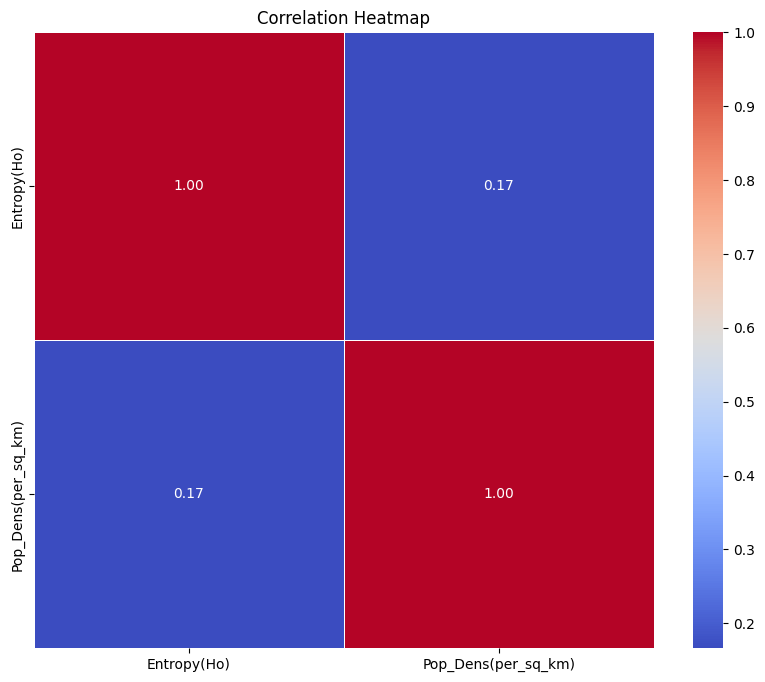

In [ ]:
# The code generates a heatmap to visually represent the correlation matrix of merged_table1, displaying relationships between two features
# this help to identify if there are any direct correlation between variables

corrmat2 = merged_table1.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corrmat2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

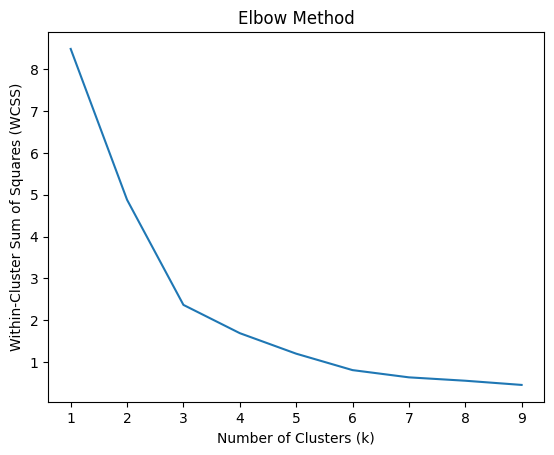

In [ ]:
k = []                                              # Created an empty list named k to store the number of clusters
wcss = []                                           # Created an empty list wcss k to store  within cluster sum of squares
for i in range(1,10):                               # created a loop iterating from 1 to 9 for variable i
  mdl2 = KMeans(n_clusters=i, n_init=10)             # this line will create a kmeans clustering model and assign it to variable mdl and for every iteration of the loop the algorithm undergoes the process of finding clusters 10[1 to 9] times with different starting points and this is repeated for each value of i in the loop.
  mdl2.fit(merged_table1.iloc[:,1:])                        # here will train the model using data from table 2 in which we have not used first two columns for clustering
  k.append(i)                                       # this will add the curerent value of i to the list k
  wcss.append(mdl2.inertia_)                         # the inertia(WCSS) is the sum of squared distances between each data point in a cluster and the centroid of that cluster it will help to understand how well the data is grouped in a cluster

sns.lineplot(x = k, y = wcss)                       # used to create a line plot
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

#Initializing K-Means Model with selected optimal number of cluster

In [ ]:
# following we are creating a k means clustering model
# where the alue of k is given as 3 hence the algorithm will group the data into 4 distinct clusters
# randomn state = 0  basically will ensure that if i run the code multiple times i will get the same result each time
# number of initializations i.e no of iterations in the loop i have assign auto so algorithm will automatically decide how many times to run its process with different initial configurations(default is 10)
k_means_model2 = KMeans(n_clusters=3, random_state=0, n_init= 20)

# the fit method will train the model on the given dataset so basically it will learn how to group the data into clusters based on the specified features
#the result of fit() will be assigned back to variable - k_means_model
k_means_model2 = k_means_model2.fit(merged_table1.iloc[:,1:])

# i have specifies which feature to take for clustering
# then the predict() method will basically predic the cluster labels i.e 0/1/2/3 for each data point using the trained kmeans model
# then i have  store the predicted cluster labels in a variable called labels.
labels = k_means_model2.predict(merged_table1.iloc[:,1:])

# i have created a new column (cluster) containing the predicted cluster labels assigned by the KMeans algorithm
# each row in the datset will now have an additional column indicating the cluster to which it belongs
merged_table1['cluster'] = labels

merged_table1



,City,Entropy(Ho),Pop_Dens(per_sq_km),cluster
0,Bangkok,0.921948,0.164783,0
1,Beijing,0.729820,0.119081,0
2,Hanoi,0.993996,0.139060,0
3,Hong Kong,0.992662,0.665577,2
4,Jakarta,0.872582,0.289302,0
...,...,...,...,...
96,Seattle,0.306204,0.023462,1
97,St Louis,0.782522,0.133684,0
98,Toronto,0.598399,0.073532,1
99,Vancouver,0.270180,0.067667,1


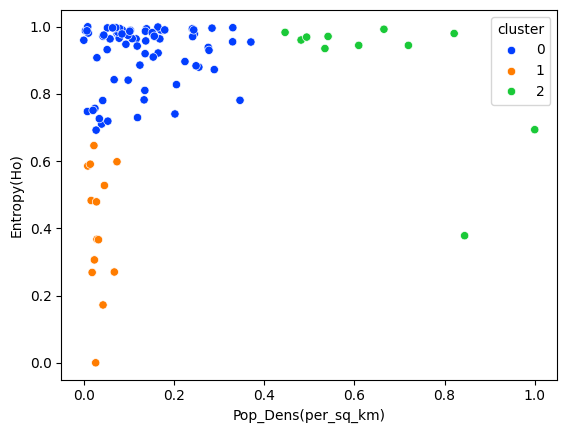

In [ ]:
# Creating a scatter plot to visualize the relationship between Population Density and Entropy for cities
# Each point is colored based on the cluster it belongs to
# used a bright color palette for better visibility of clusters


sns.scatterplot (x='Pop_Dens(per_sq_km)',y= 'Entropy(Ho)', hue='cluster', data=merged_table1,palette='bright')
plt.show()

In [ ]:
# Here I will create separate DataFrames for each cluster each cluster dataframe will contain data points assigned to that specific cluster
# For example the variable cluster_0 will have the data points belonging to cluster 0
# The reset_index method is used to discard the old index so it will ensure that the output has a new index in sequence which is being achieved by using the drop=True parameter

cluster_0 = merged_table1[merged_table1['cluster']==0].reset_index(drop=True)

cluster_1 = merged_table1[merged_table1['cluster']==1].reset_index(drop=True)

cluster_2 = merged_table1[merged_table1['cluster']==2].reset_index(drop=True)


#Analyzing Cities based on Entropy and Population Density


![Picture](https://drive.google.com/uc?export=view&id=12nDQmYvNu622JExcT9Qegh-oWNUDsM__)

In this analysis i will try to understand whether there is any correlation between the entropy and population density of cities.

will see impact of Population Density on Road Quality:

We will see whether cities with higher population density tend to have better or worse road structures and vice versa

The focus will be on identifying clusters of cities where road quality is influenced by population density

**After analyzing the data using the describe() method, we can draw the following conclusions:**

***Cluster 1 Analysis:***

Cities in Cluster 1 exhibit the lowest average entropy, suggesting structured and well-maintained roads.
Notably, this cluster has the lowest population density, indicating a potential correlation between low population density and good roads.

**Cluster 0 and Cluster 2 Comparison:**

Cities in both Cluster 0 and Cluster 1 have similar average entropy, indicating comparable road structures.
However, in Cluster 0, despite having low population density, cities experience bad roads. In contrast, Cluster 2 shows a direct proportionality between bad roads and high population density.

**General Observation:**
A significant number of cities fall into Cluster 0, where low population density coexists with bad roads. This implies that low population density alone may not guarantee good road conditions.

**Interpretation:**
The analysis suggests that population density alone does not result into how good or bad road conditions are. \
 While low population density in Cluster 1 correlates with good roads, Cluster0 cities, despite having low population density, experience bad roads.\
Furthermore, Cluster 2 shows that high population density tends to coincide with bad road conditions.
hence population density alone does not result into how good or bad road conditions are



In [ ]:
# now for each cluster using describe() method we can understand statistics for features in each cluster
# here i have included all columns except the label(cluster) column which we dont need for statistical analysis

cluster_0.iloc[:, :3].describe()



,Entropy(Ho),Pop_Dens(per_sq_km)
count,75.000000,75.000000
mean,0.922553,0.130157
std,0.090400,0.092447
min,0.692462,0.000000
25%,0.884923,0.060976
50%,0.964643,0.115965
75%,0.987992,0.172405
max,1.000000,0.370502


In [ ]:
cluster_1.iloc[:, :3].describe()


,Entropy(Ho),Pop_Dens(per_sq_km)
count,14.000000,14.000000
mean,0.404460,0.032081
std,0.187537,0.019221
min,0.000000,0.008737
25%,0.279186,0.019445
50%,0.423282,0.027174
75%,0.571214,0.040088
max,0.646431,0.073532


In [ ]:
cluster_2.iloc[:, :3].describe()

,Entropy(Ho),Pop_Dens(per_sq_km)
count,11.000000,11.000000
mean,0.886712,0.650875
std,0.188022,0.177621
min,0.378252,0.446325
25%,0.939960,0.514465
50%,0.960640,0.609672
75%,0.975650,0.770575
max,0.992662,1.000000


cities with low density and low Entropy i.e good roads which comes under cluster 1

In [ ]:

cluster_1.head()

,City,Entropy(Ho),Pop_Dens(per_sq_km),cluster
0,Chicago,0.000000,0.026303,1
1,Cleveland,0.585724,0.008737,1
2,Denver,0.367578,0.029144,1
3,Detroit,0.482989,0.016283,1
4,Houston,0.646431,0.022423,1


In [ ]:
# cities with high entropy (bad roads) and high population density
cluster_2.head(5)

,City,Entropy(Ho),Pop_Dens(per_sq_km),cluster
0,Hong Kong,0.992662,0.665577,2
1,Kabul,0.944630,0.609672,2
2,Karachi,0.935290,0.534735,2
3,Kathmandu,0.960640,0.481793,2
4,Mumbai,0.944630,0.719833,2


# Hierarchical Clustering Explanation

I will be performing hierarchical clustering on city data using features like entropy and population density from merged_table1.

firstly i will create a dendrogram using the scipy library. [A dendrogram is like a tree diagram that shows the arrangement of clusters.]

then i will experiment with four different linkage methods:
 1. **Single Linkage:** Finding the shortest distance between any two points in clusters.
 2. **Complete Linkage:** Identifying the longest distance between any two points in clusters.
 3. **Average Linkage:** Calculating the average distance between all pairs of points in clusters.
 4. **Ward's Method:** Minimizing the variance within each cluster by minimizing the sum of squared differences.

 By exploring these methods, we can understand how different ways of measuring distances between clusters influence the clustering results.


# 1. USING SINGLE LINKAGE METHOD

In [ ]:
hie_clus_table = merged_table1[['City',	'Entropy(Ho)',	'Pop_Dens(per_sq_km)']].copy()
hie_clus_table

,City,Entropy(Ho),Pop_Dens(per_sq_km)
0,Bangkok,0.921948,0.164783
1,Beijing,0.729820,0.119081
2,Hanoi,0.993996,0.139060
3,Hong Kong,0.992662,0.665577
4,Jakarta,0.872582,0.289302
...,...,...,...
96,Seattle,0.306204,0.023462
97,St Louis,0.782522,0.133684
98,Toronto,0.598399,0.073532
99,Vancouver,0.270180,0.067667


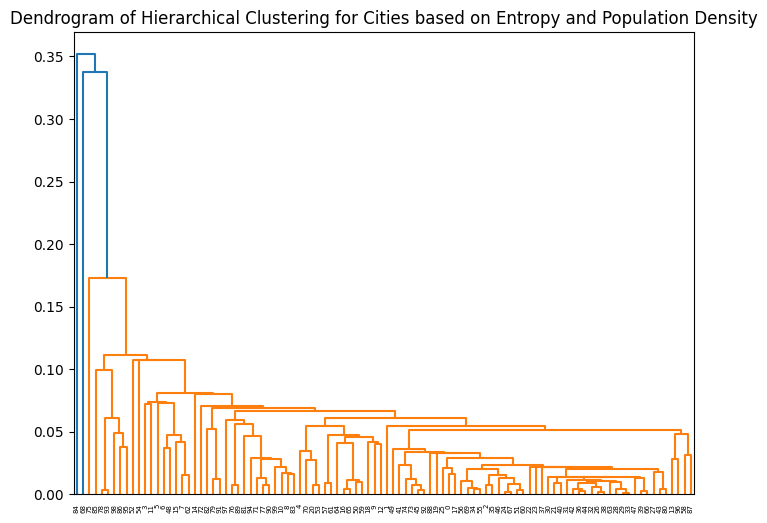

In [ ]:
# creating a dendrogram for hierarchical clustering using scipy library
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# setting up the figure size and title for the dendrogram
plt.figure(figsize=(8, 6))
plt.title('Dendrogram of Hierarchical Clustering for Cities based on Entropy and Population Density')

# extracting relevant features (entropy and Population Density) from the merged_table1 dataset
selected_features = hie_clus_table.iloc[:, 1:3]

# performing hierarchical clustering with the single linkage method
linkage_data = linkage(selected_features, method='single')

# generating the dendrogram based on the linkage data
dendrogram_plot = dendrogram(linkage_data)

# the dendrogram visually represents the clustering structure of cities based on entropy and Population Density.
# in single linkage clusters are formed by the shortest distance between any two points in the clusters.


In [ ]:
# importing the AgglomerativeClustering module from sklearn
from sklearn.cluster import AgglomerativeClustering

# Creating a clustering model to perform hierarchical clustering with the following specifications:
# n_clusters: Number of clusters to form (in this case, 3 clusters)
# affinity: Type of distance measurement used (here, 'euclidean' distance)
# linkage: Method for merging clusters ('single' linkage method in this instance)

hie_clu_model1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='single')

# training the model and assigning cluster labels to each data point based on the features (entropy and Population Density)
hie_clu_model1.fit_predict(hie_clus_table.iloc[:,1:3])

# here will see the  assigned cluster labels for each data points after clustering
hie_clu_model1.labels_

hie_clus_table1 = hie_clus_table.copy()
hie_clus_table1['cluster'] = hie_clu_model1.labels_

hie_clus_table1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,City,Entropy(Ho),Pop_Dens(per_sq_km),cluster
0,Bangkok,0.921948,0.164783,0
1,Beijing,0.729820,0.119081,0
2,Hanoi,0.993996,0.139060,0
3,Hong Kong,0.992662,0.665577,0
4,Jakarta,0.872582,0.289302,0
...,...,...,...,...
96,Seattle,0.306204,0.023462,0
97,St Louis,0.782522,0.133684,0
98,Toronto,0.598399,0.073532,0
99,Vancouver,0.270180,0.067667,0


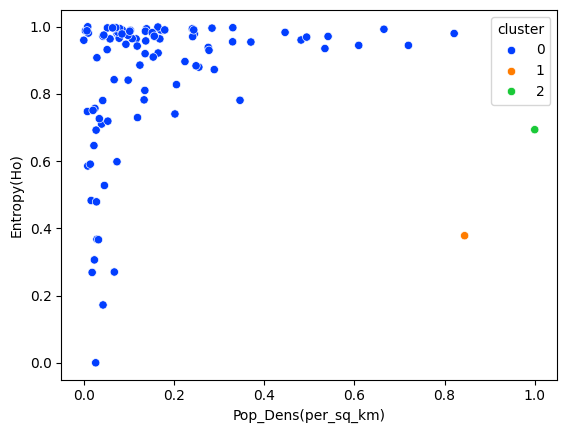

In [ ]:
# Creating a scatter plot to visualize the relationship between Population Density and Entropy for cities
# Each point is colored based on the cluster it belongs to
# used a bright color palette for better visibility of clusters


sns.scatterplot (x='Pop_Dens(per_sq_km)',y= 'Entropy(Ho)', hue='cluster', data=hie_clus_table1,palette='bright')
plt.show()

# 2. USING COMPLETE LINKAGE METHOD

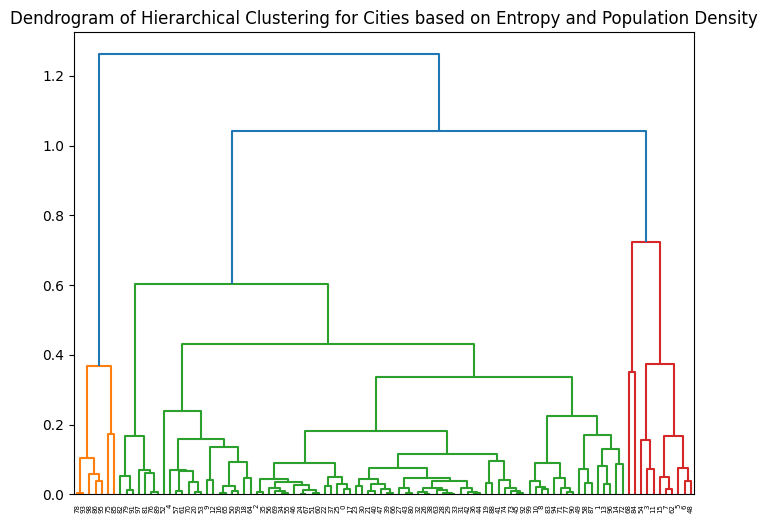

In [ ]:

plt.figure(figsize=(8, 6))
plt.title('Dendrogram of Hierarchical Clustering for Cities based on Entropy and Population Density')

linkage_data2 = linkage(selected_features, method='complete')

dendrogram_plot2 = dendrogram(linkage_data2)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hie_clu_model2 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='complete')
hie_clu_model2.fit_predict(hie_clus_table.iloc[:,1:3])
hie_clu_model2.labels_
hie_clus_table2 = hie_clus_table
hie_clus_table2['cluster'] = hie_clu_model2.labels_

hie_clus_table2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,City,Entropy(Ho),Pop_Dens(per_sq_km),cluster
0,Bangkok,0.921948,0.164783,2
1,Beijing,0.729820,0.119081,2
2,Hanoi,0.993996,0.139060,2
3,Hong Kong,0.992662,0.665577,0
4,Jakarta,0.872582,0.289302,2
...,...,...,...,...
96,Seattle,0.306204,0.023462,1
97,St Louis,0.782522,0.133684,2
98,Toronto,0.598399,0.073532,2
99,Vancouver,0.270180,0.067667,1


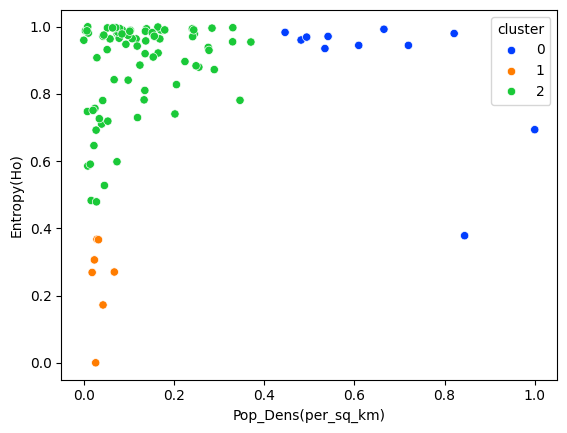

In [ ]:
sns.scatterplot (x='Pop_Dens(per_sq_km)',y= 'Entropy(Ho)', hue='cluster', data=hie_clus_table2,palette='bright')
plt.show()

# 3. USING AVERAGE LINKAGE METHOD

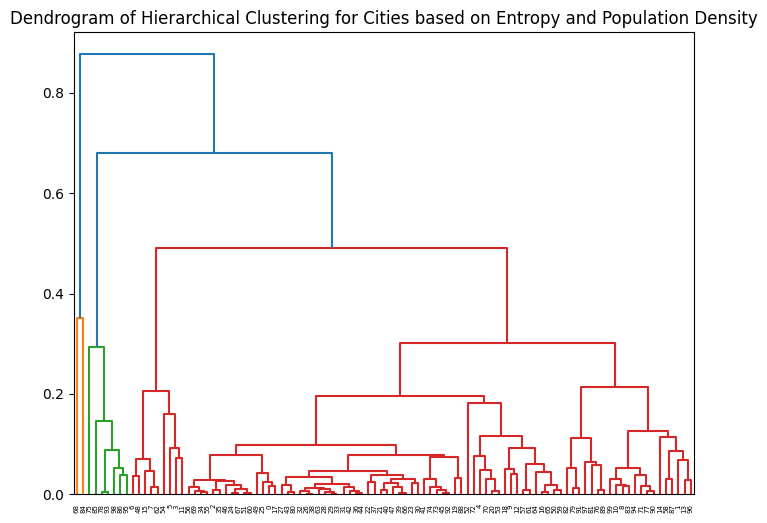

In [ ]:

plt.figure(figsize=(8, 6))
plt.title('Dendrogram of Hierarchical Clustering for Cities based on Entropy and Population Density')

linkage_data3 = linkage(selected_features, method='average')

dendrogram_plot3 = dendrogram(linkage_data3)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hie_clu_model3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='average')
hie_clu_model3.fit_predict(hie_clus_table.iloc[:,1:3])
hie_clu_model3.labels_
hie_clus_table3 = hie_clus_table
hie_clus_table3['cluster'] = hie_clu_model3.labels_

hie_clus_table3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,City,Entropy(Ho),Pop_Dens(per_sq_km),cluster
0,Bangkok,0.921948,0.164783,0
1,Beijing,0.729820,0.119081,0
2,Hanoi,0.993996,0.139060,0
3,Hong Kong,0.992662,0.665577,0
4,Jakarta,0.872582,0.289302,0
...,...,...,...,...
96,Seattle,0.306204,0.023462,2
97,St Louis,0.782522,0.133684,0
98,Toronto,0.598399,0.073532,0
99,Vancouver,0.270180,0.067667,2


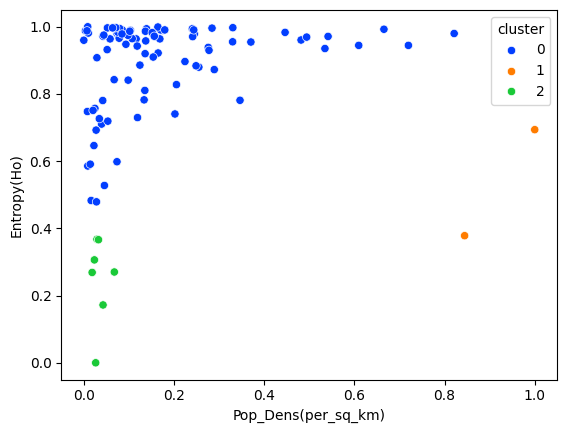

In [ ]:
sns.scatterplot (x='Pop_Dens(per_sq_km)',y= 'Entropy(Ho)', hue='cluster', data=hie_clus_table3,palette='bright')
plt.show()

# 4. USING WARD LINKAGE METHOD

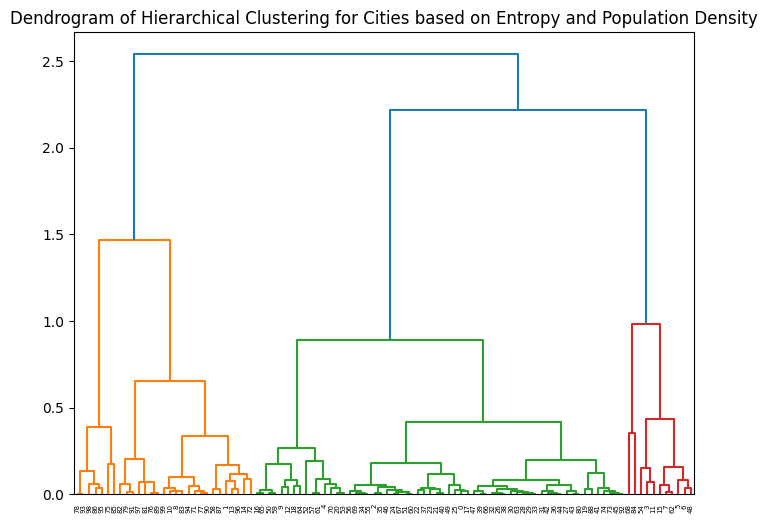

In [ ]:

plt.figure(figsize=(8, 6))
plt.title('Dendrogram of Hierarchical Clustering for Cities based on Entropy and Population Density')

linkage_data4 = linkage(selected_features, method='ward')

dendrogram_plot4 = dendrogram(linkage_data4)


In [ ]:
from sklearn.cluster import AgglomerativeClustering

hie_clu_model4 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward')
hie_clu_model4.fit_predict(hie_clus_table.iloc[:,1:3])
hie_clu_model4.labels_
hie_clus_table4 = hie_clus_table
hie_clus_table4['cluster'] = hie_clu_model4.labels_

hie_clus_table4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,City,Entropy(Ho),Pop_Dens(per_sq_km),cluster
0,Bangkok,0.921948,0.164783,2
1,Beijing,0.729820,0.119081,0
2,Hanoi,0.993996,0.139060,2
3,Hong Kong,0.992662,0.665577,1
4,Jakarta,0.872582,0.289302,2
...,...,...,...,...
96,Seattle,0.306204,0.023462,0
97,St Louis,0.782522,0.133684,0
98,Toronto,0.598399,0.073532,0
99,Vancouver,0.270180,0.067667,0


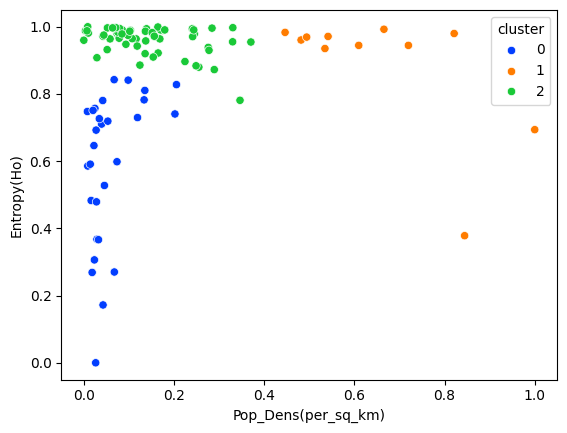

In [ ]:
sns.scatterplot (x='Pop_Dens(per_sq_km)',y= 'Entropy(Ho)', hue='cluster', data=hie_clus_table4,palette='bright')
plt.show()

# Hierarchical Clustering Insights

**Single Linkage:**


1.   In the first plot, where Single Linkage method was applied, clusters are formed by connecting points with the shortest distance.
2.  This method is advantageous for detecting elongated structures.
3. However if we see the cluster formed when we did k means clustering we got 3 clusters but here after using this method the drawback is evident in the plot, as clusters(cluster 0 and cluster 2 when we did k means ) are being connected by small groups leading to a chaining effect this happens because in data there are some cities which has high population density compare to othere cities hence this are outliers and this forms strong link with its nearest city and this leads to chain like structure
3. This sensitivity to outliers impacts the accuracy of clustering.

**Complete Linkage:**
1. Moving on to the second plot, Complete Linkage was used.
2. This method considers the longest distance between any two points in clusters, resulting in more compact and spherical clusters.
3. If we see when we did k means on the same data we got  cluster_0 which had total of 75 cities now on same data when we did hierarchical clustering using complete linkage method what happens is as this method aim for the longest distance hence it way merge the cities in *cluster_0(k-means)* with the outskirts of *cluster_1 and cluster_2 (k-means)* which we can see in plot if we compare with our k-means model
3. But in the plot, we can notice well-defined and cohesive groups are formed but the problem can be that the cities from 1 group can belong to other group even though they dont really fit together

**Average Linkage:**
1. For the third plot, Average Linkage was chosen, this method is a balance between Single and Complete Linkage.
2. This method considers the average distance between all pairs of points in clusters.
3. As a result, the clusters may exhibit moderate compactness. but this cant be seen in the plot because of its drawback
4. The drawback of this methodbut is it might not handle clusters well if they have varying sizes we can see cluster_0 has the maximum cities hence it prioritize longer distances this impacts the sizes of the identified clusters. This results in distorted clusters

**Ward's Method:**
1. In the final plot, Ward Method was employed, aiming to minimize the variance within each cluster. By doing so, it tries to ensure that cities within the same cluster are more homogenous, displaying less variability in their population density and entropy.
2. The clusters in the plot show more even sizes and density.
3. However, if dataset contains cities with diverse characteristics some having high population density and low entropy, while others have low population density and high entropy Ward's Method might oversimplify things. It might merge cities with different traits into clusters that seem more alike, missing the detailed differences between cities. so in conclusion, it might not represent the unique characteristics of each city accurately.